## benchmarking on sushmita ROY's dataset


In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt
import scanpy as sc
from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


2024-05-21 10:00:55,500:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-05-21 10:00:55,624:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-05-21 10:00:55,718:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-05-21 10:00:55,812:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-05-21 10:00:55,899:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-05-21 10:00:56,083:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core

In [2]:
# '../../data/main/gene_embeddings.parquet')
model = scPrint.load_from_checkpoint(
    '../../data/temp/wli32e2j/last.ckpt', precpt_gene_emb=None)

MAXGENES = 5000

RuntimeError caught: scPrint is not attached to a `Trainer`.



In [3]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)

# liu / full


In [4]:
preadata = get_sroy_gt(get="liu", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 10537 elements,
 33)

/tmp/ipykernel_1637396/3145095026.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:270: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 11725 ...
doing regression....
metrics {'used_heads': 67, 'precision': 0.005506607929515419, 'random_precision': 0.0010413009987395255, 'recall': 0.004366812227074236, 'predicted_true': 908.0, 'number_of_true': 1145.0, 'epr': 4.2216874422899355}


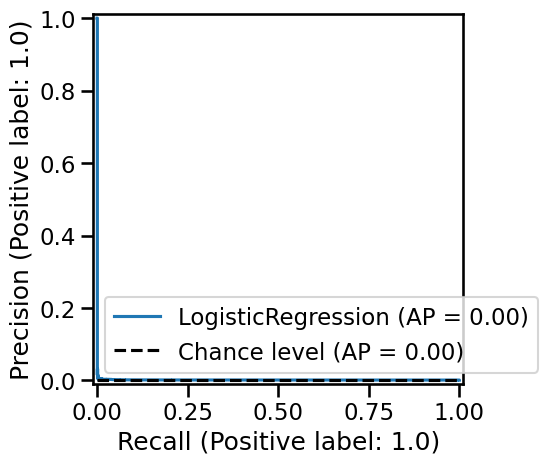

precision:  0.03094632492010696 
recall:  1.0 
random precision: 0.030952717468117723


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1016.91it/s]


Area Under Precision-Recall Curve (AUPRC):  0.03280817869251704
EPR: 1.107974082644628


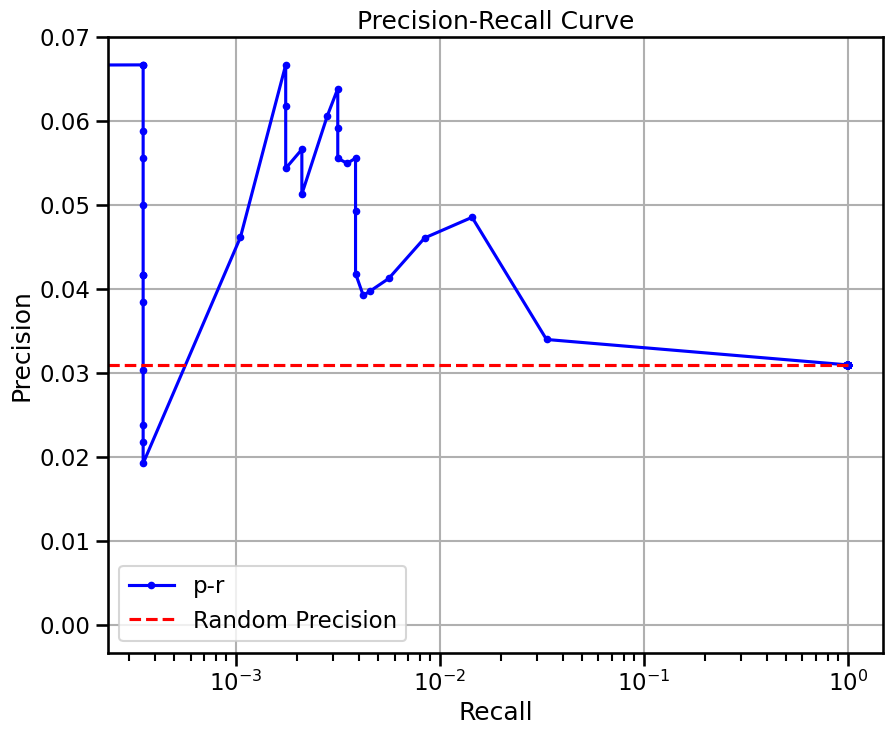

pred shape (19, 4842, 96)
true elem 2847 ...
doing regression....
metrics {'used_heads': 56, 'precision': 0.02042335223168356, 'random_precision': 0.020348268440618274, 'recall': 0.9967948717948718, 'predicted_true': 45683.0, 'number_of_true': 936.0, 'epr': 1.3300061090151953}


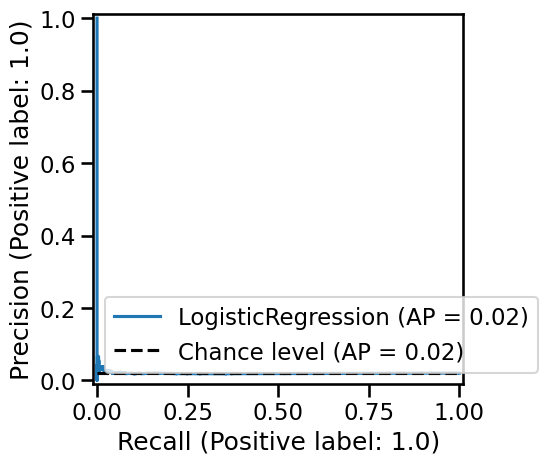

precision:  0.03094632492010696 
recall:  1.0 
random precision: 0.030952717468117723


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1085.28it/s]


Area Under Precision-Recall Curve (AUPRC):  0.057489538709659026
EPR: 1.5862391338397681


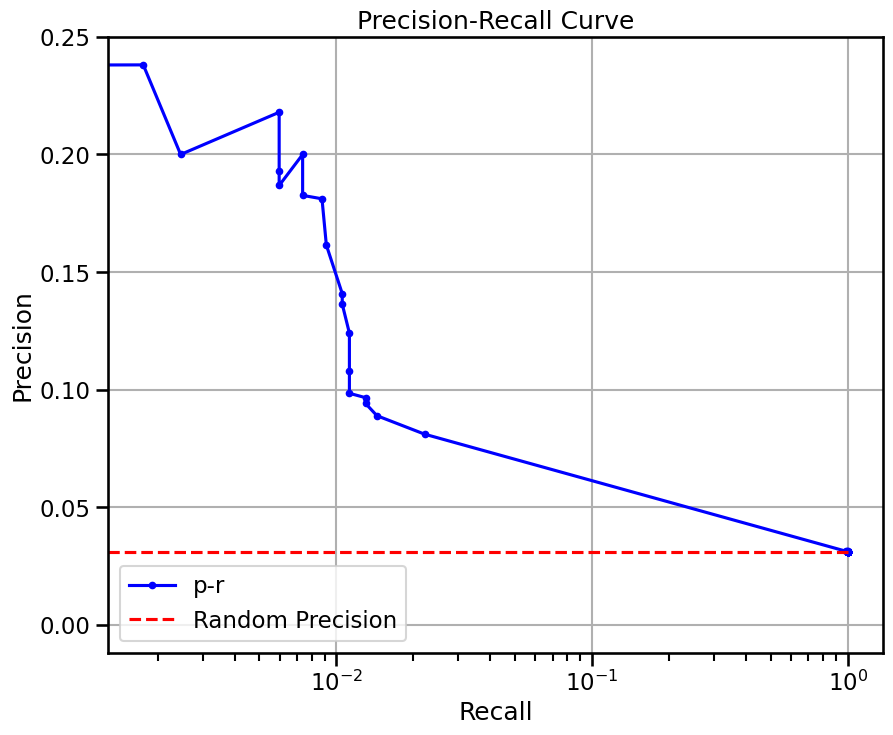

{'precision': 0.03094632492010696,
 'recall': 1.0,
 'rand_precision': 0.030952717468117723,
 'auprc': 0.057489538709659026,
 'EPR': 1.5862391338397681}

In [5]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn, m, clf_omni = train_classifier(grn, C=0.3, train_size=0.9, class_weight={
                                    1: 200, 0: 1}, shuffle=True)
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, clf_self = train_classifier(
    grn, other=preadata, C=0.5, train_size=0.5, class_weight={1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23522500, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.03094632492010696 
recall:  1.0 
random precision: 0.030952717468117723


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 2079.46it/s]


Area Under Precision-Recall Curve (AUPRC):  0.03254970537769371
EPR: 1.144777325338467


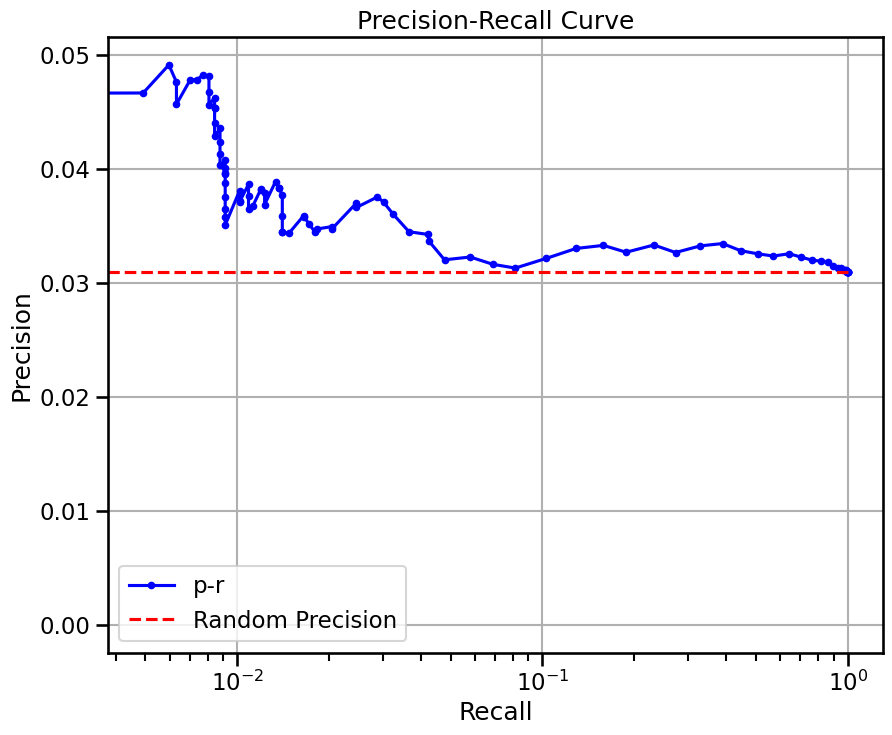

{'precision': 0.03094632492010696,
 'recall': 1.0,
 'rand_precision': 0.030952717468117723,
 'auprc': 0.03254970537769371,
 'EPR': 1.144777325338467}

In [6]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# liu / chip


In [7]:
preadata = get_sroy_gt(get="liu", species="human", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 435395 elements,
 90)

/tmp/ipykernel_1619839/3297281218.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:270: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 11725 ...
doing regression....
metrics {'used_heads': 79, 'precision': 0.005291005291005291, 'random_precision': 0.0010413009987395255, 'recall': 0.004366812227074236, 'predicted_true': 945.0, 'number_of_true': 1145.0, 'epr': 4.2216874422899355}


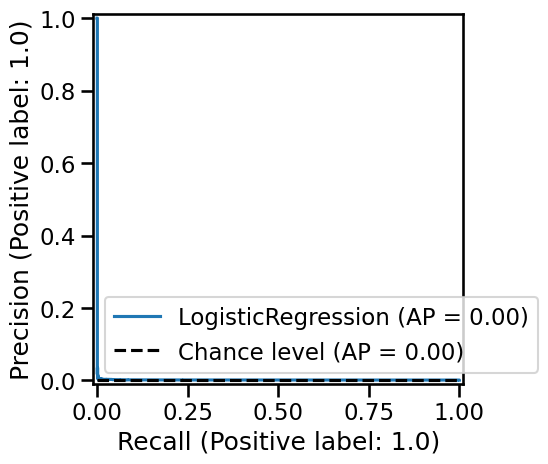

precision:  0.2787394155307724 
recall:  1.0 
random precision: 0.27879699442263994


 90%|███████▏| 89/99 [00:00<00:00, 468.30it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 445.05it/s]


Area Under Precision-Recall Curve (AUPRC):  0.274092418192919
EPR: 0.9890372036310777


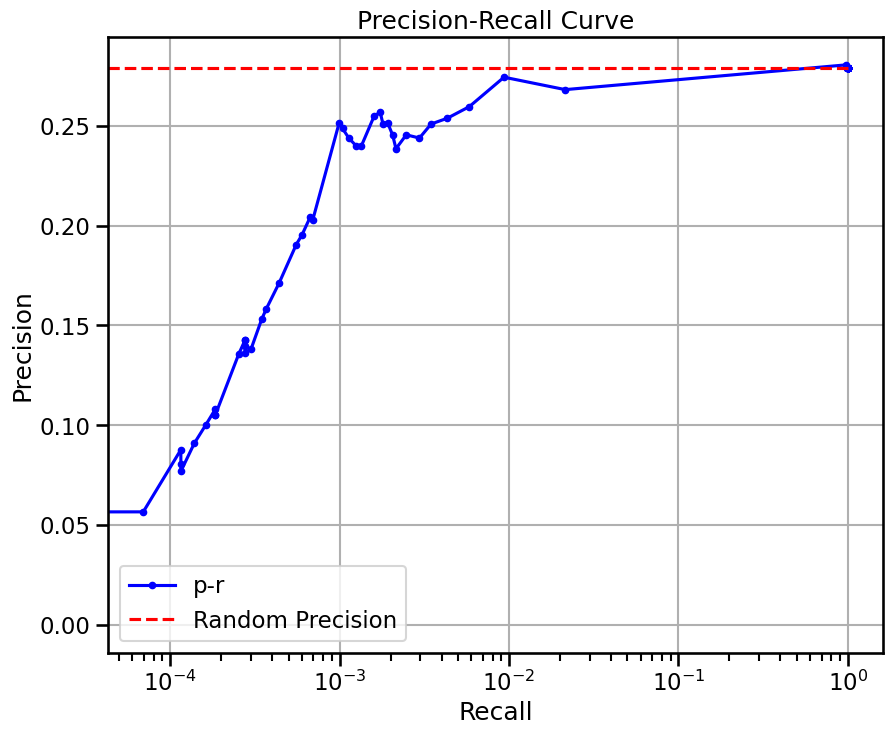

pred shape (32, 4842, 96)
true elem 43189 ...
doing regression....
metrics {'used_heads': 42, 'precision': 0.31047909729929707, 'random_precision': 0.30977033219313854, 'recall': 0.99913685338413, 'predicted_true': 108120.0, 'number_of_true': 33598.0, 'epr': 1.0183616761305072}


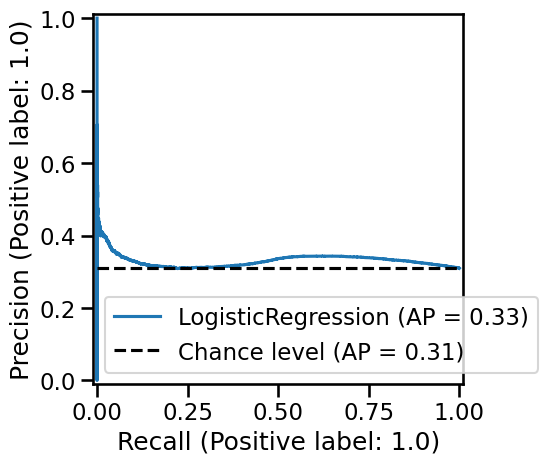

precision:  0.2787394155307724 
recall:  1.0 
random precision: 0.27879699442263994


 87%|██████▉ | 86/99 [00:00<00:00, 454.01it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 409.38it/s]


Area Under Precision-Recall Curve (AUPRC):  0.3200828815188869
EPR: 1.0488433320340746


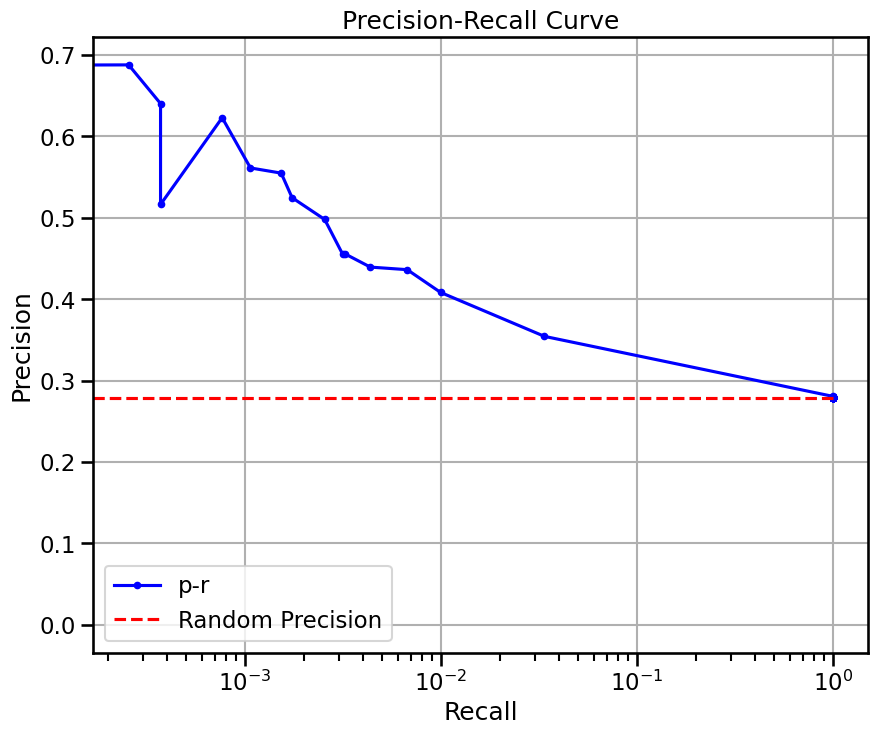

{'precision': 0.2787394155307724,
 'recall': 1.0,
 'rand_precision': 0.27879699442263994,
 'auprc': 0.3200828815188869,
 'EPR': 1.0488433320340746}

In [8]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
# grn.varp["classified"] = clf_omni.predict_proba(
#    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
# ).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn, m, clf_omni2 = train_classifier(grn, C=1, train_size=0.9, class_weight={
    1: 200, 0: 1}, shuffle=True)
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.3, class_weight={
                             1: 10, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23522500, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.2787394155307724 
recall:  1.0 
random precision: 0.27879699442263994


 98%|███████▊| 97/99 [00:00<00:00, 513.99it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 476.98it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2641976655265712
EPR: 0.8553271032939066


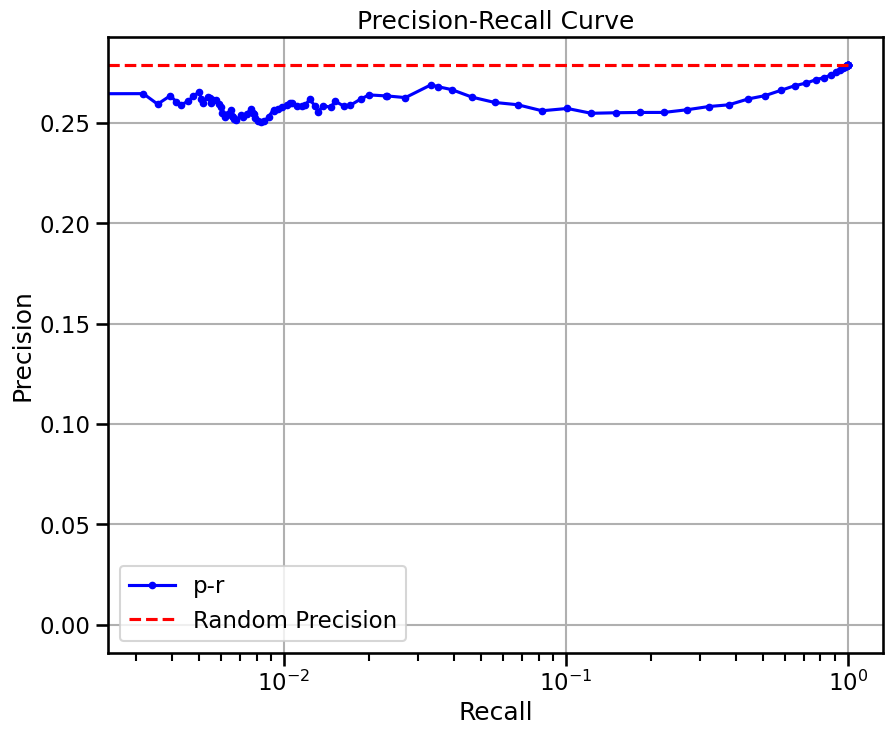

{'precision': 0.2787394155307724,
 'recall': 1.0,
 'rand_precision': 0.27879699442263994,
 'auprc': 0.2641976655265712,
 'EPR': 0.8553271032939066}

In [9]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

## liu / ko


In [10]:
preadata = get_sroy_gt(get="liu", species="human", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 108194 elements,
 157)

/tmp/ipykernel_1619839/2814545433.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:270: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 11725 ...
doing regression....
metrics {'used_heads': 79, 'precision': 0.005291005291005291, 'random_precision': 0.0010413009987395255, 'recall': 0.004366812227074236, 'predicted_true': 945.0, 'number_of_true': 1145.0, 'epr': 4.2216874422899355}


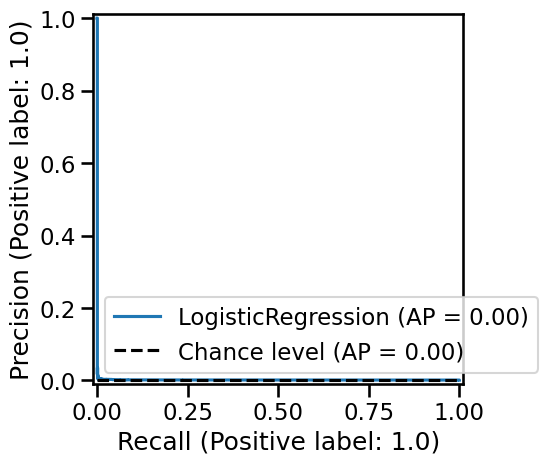

precision:  0.05674777514926214 
recall:  1.0 
random precision: 0.05675949747422584


 97%|███████▊| 96/99 [00:00<00:00, 506.62it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 467.41it/s]


Area Under Precision-Recall Curve (AUPRC):  0.061535054286236304
EPR: 1.1595439911941159


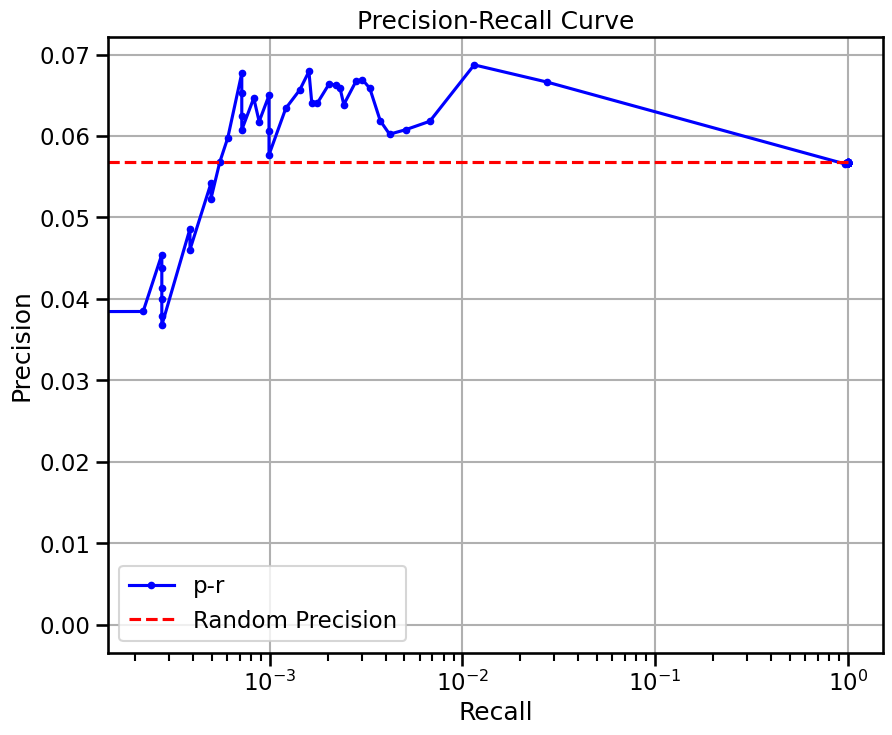

pred shape (66, 4842, 96)
true elem 18135 ...
doing regression....
metrics {'used_heads': 66, 'precision': 0.05884867841963635, 'random_precision': 0.058753582917151694, 'recall': 0.9970174691095015, 'predicted_true': 159052.0, 'number_of_true': 9388.0, 'epr': 1.420436063957476}


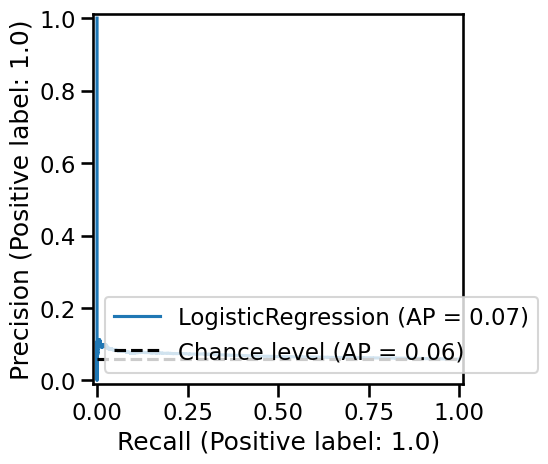

precision:  0.05674777514926214 
recall:  1.0 
random precision: 0.05675949747422584


 74%|█████▉  | 73/99 [00:00<00:00, 374.43it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 372.56it/s]


Area Under Precision-Recall Curve (AUPRC):  0.07612621542962009
EPR: 1.5949276347469192


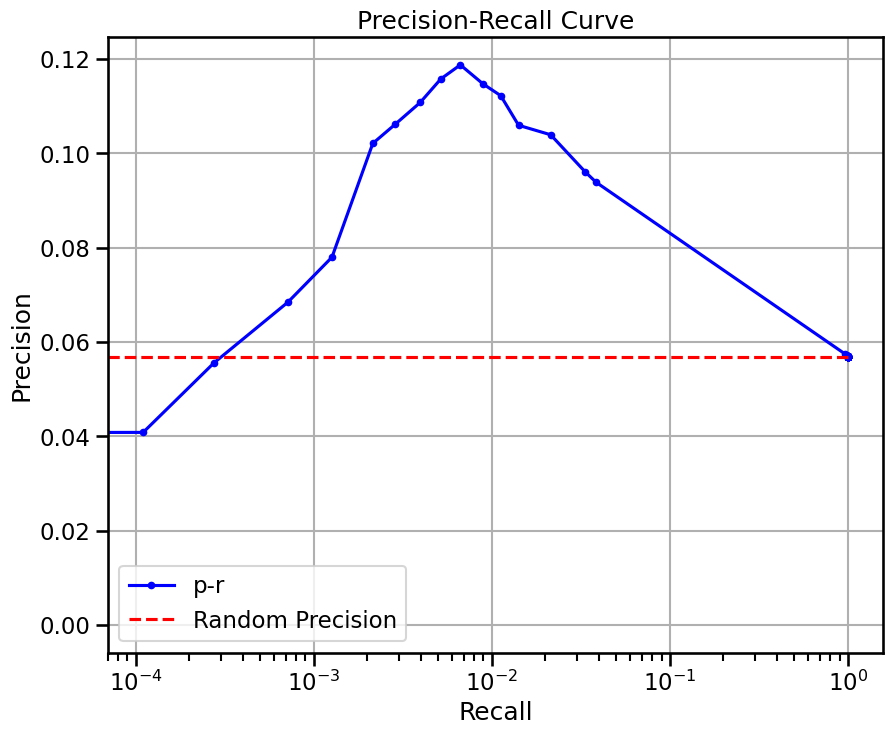

{'precision': 0.05674777514926214,
 'recall': 1.0,
 'rand_precision': 0.05675949747422584,
 'auprc': 0.07612621542962009,
 'EPR': 1.5949276347469192}

In [11]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
# grn.varp["classified"] = clf_omni.predict_proba(
#    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
# ).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn, m, clf_omni = train_classifier(grn, C=1, train_size=0.9, class_weight={
                                    1: 200, 0: 1}, shuffle=True)
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 16947


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23522500, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.05674777514926214 
recall:  1.0 
random precision: 0.05675949747422584


 37%|██▉     | 37/99 [00:00<00:00, 366.38it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 540.15it/s]


Area Under Precision-Recall Curve (AUPRC):  0.061640787069102525
EPR: 1.1347628286487916


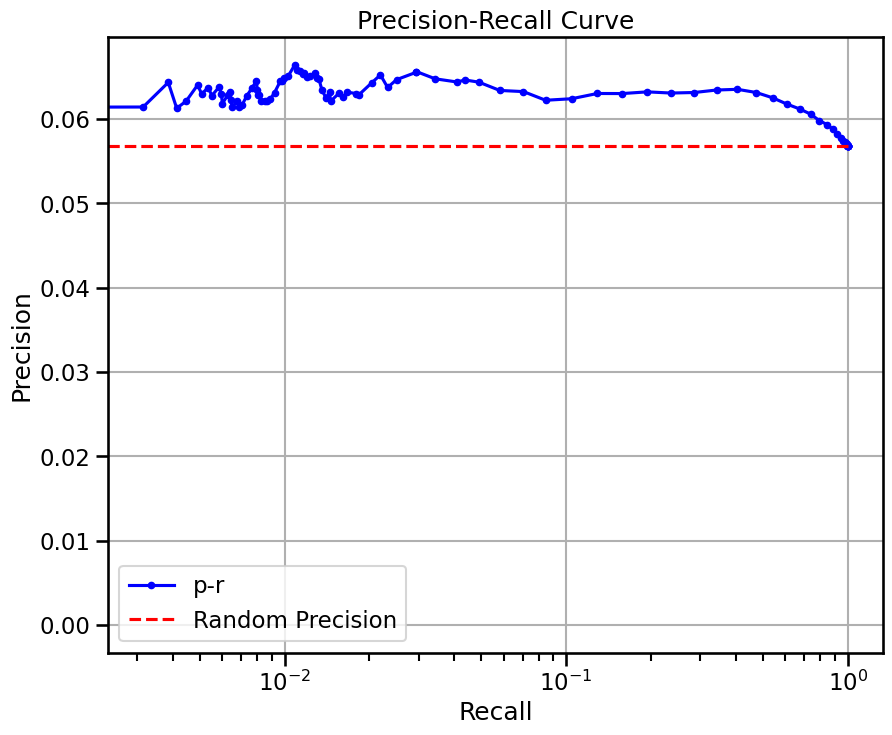

{'precision': 0.05674777514926214,
 'recall': 1.0,
 'rand_precision': 0.05675949747422584,
 'auprc': 0.061640787069102525,
 'EPR': 1.1347628286487916}

In [12]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# chen / all


In [13]:
preadata = get_sroy_gt(get="chen", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 385 renamining
filtered out 0 cells, 385 renamining
Removed 0 genes.
startin QC
Seeing 38 outliers (9.87% of total dataset):
done


(GRnnData object with n_obs × n_vars = 385 × 8595
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 2969 elements,
 19)

/tmp/ipykernel_1619839/1308650287.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 7906


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.017410924132744195 
recall:  1.0 
random precision: 0.01741452589611464


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1948.13it/s]


Area Under Precision-Recall Curve (AUPRC):  0.01895388695298286
EPR: 1.185777895554483


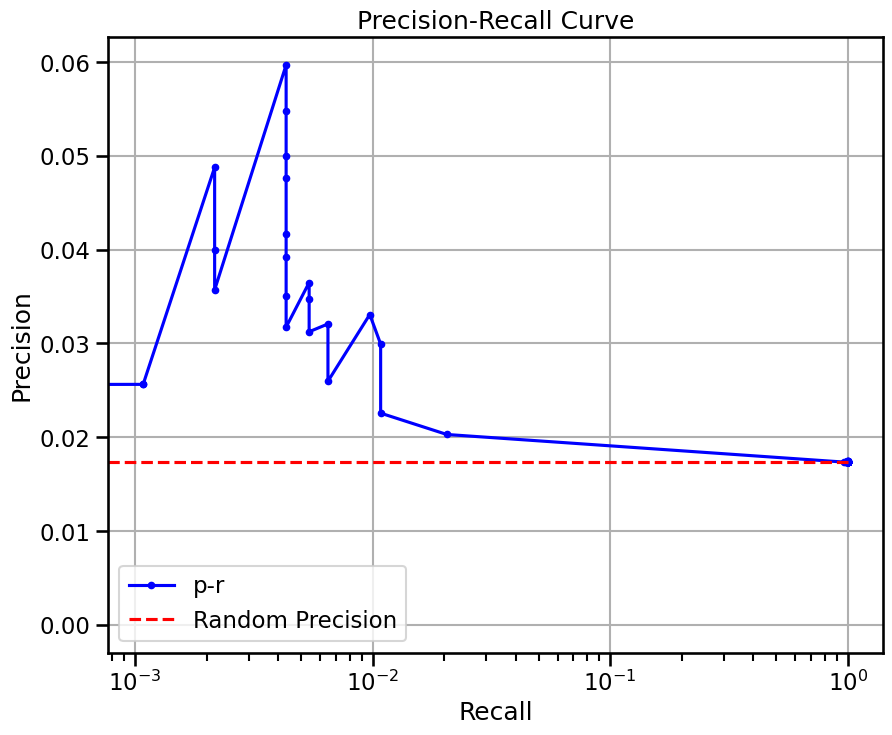

pred shape (11, 4835, 96)
true elem 926 ...
doing regression....
metrics {'used_heads': 7, 'precision': 0.00394842868654311, 'random_precision': 0.00394842868654311, 'recall': 1.0, 'predicted_true': 37230.0, 'number_of_true': 147.0, 'epr': 5.344184027777778}


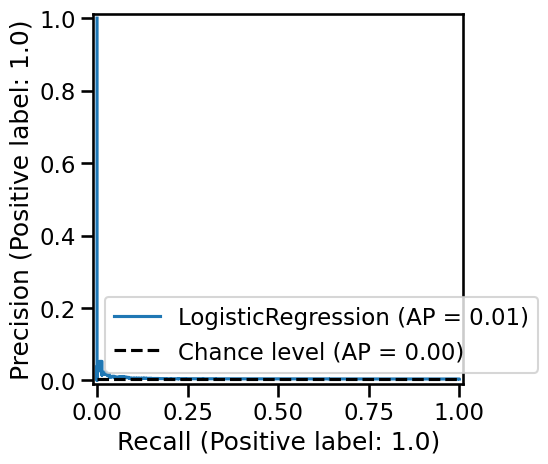

precision:  0.017410924132744195 
recall:  1.0 
random precision: 0.01741452589611464


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1817.66it/s]


Area Under Precision-Recall Curve (AUPRC):  0.06940579794404161
EPR: 1.9189453125


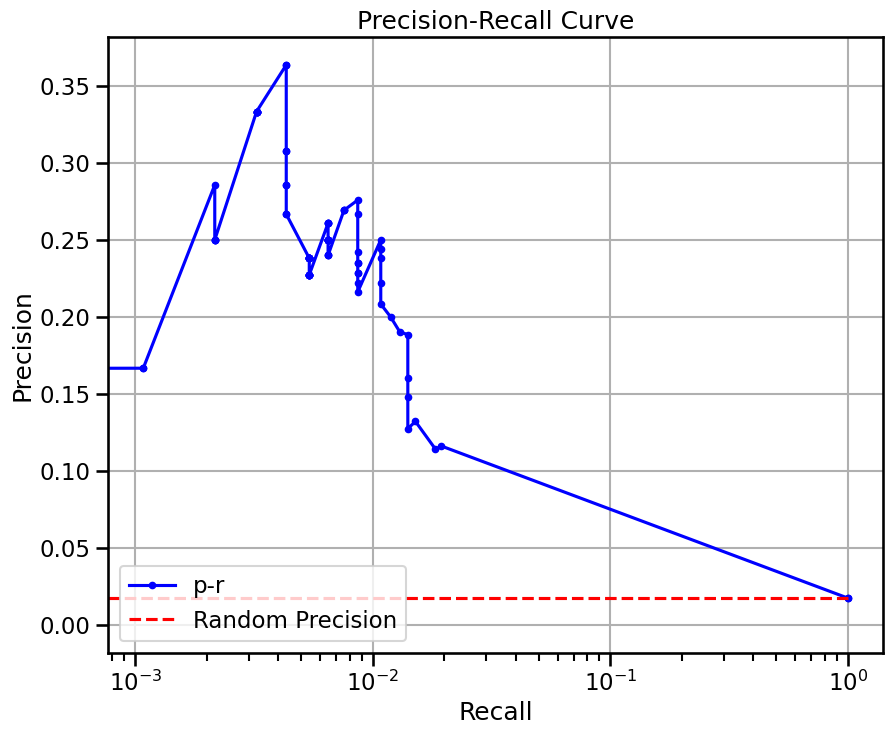

{'precision': 0.017410924132744195,
 'recall': 1.0,
 'rand_precision': 0.01741452589611464,
 'auprc': 0.06940579794404161,
 'EPR': 1.9189453125}

In [14]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf_omni.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={
                             1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 7906


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23454649, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.017410924132744195 
recall:  1.0 
random precision: 0.01741452589611464


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 2727.62it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02092389255707449
EPR: 1.5812680693913903


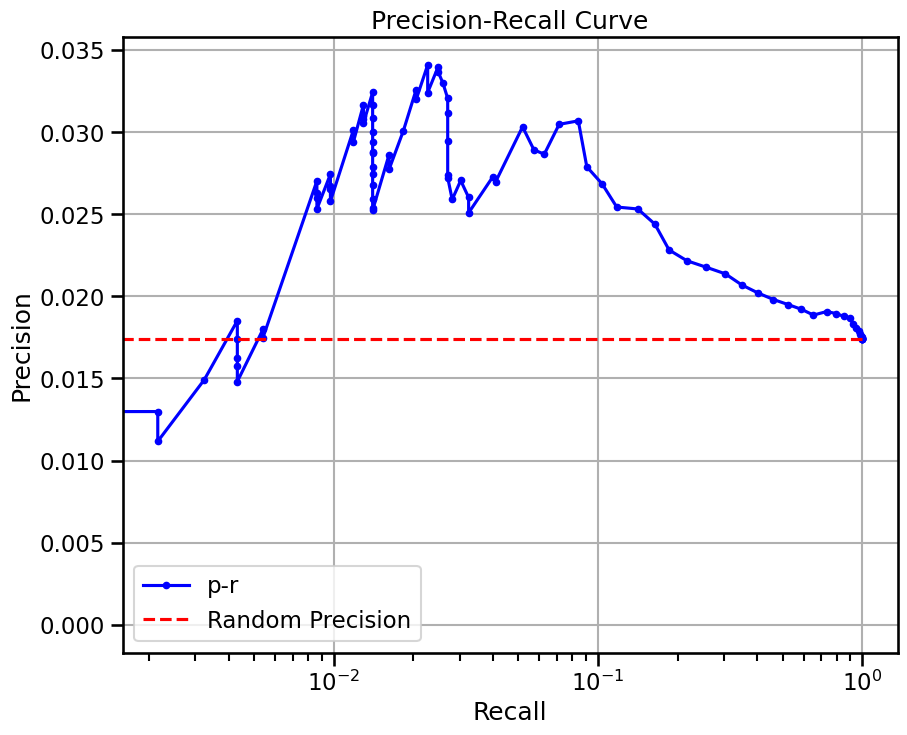

{'precision': 0.017410924132744195,
 'recall': 1.0,
 'rand_precision': 0.01741452589611464,
 'auprc': 0.02092389255707449,
 'EPR': 1.5812680693913903}

In [15]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# Duren / all


In [16]:
preadata = get_sroy_gt(get="duren", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 464 renamining
filtered out 0 cells, 464 renamining
Removed 0 genes.
startin QC
Seeing 22 outliers (4.74% of total dataset):
done


(GRnnData object with n_obs × n_vars = 464 × 15299
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 7466 elements,
 44)

/tmp/ipykernel_1619839/1583948291.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 14620


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.006052047609441194 
recall:  1.0 
random precision: 0.006053268765133172


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 3146.63it/s]


Area Under Precision-Recall Curve (AUPRC):  0.00782294683044834
EPR: 1.8544375710137608


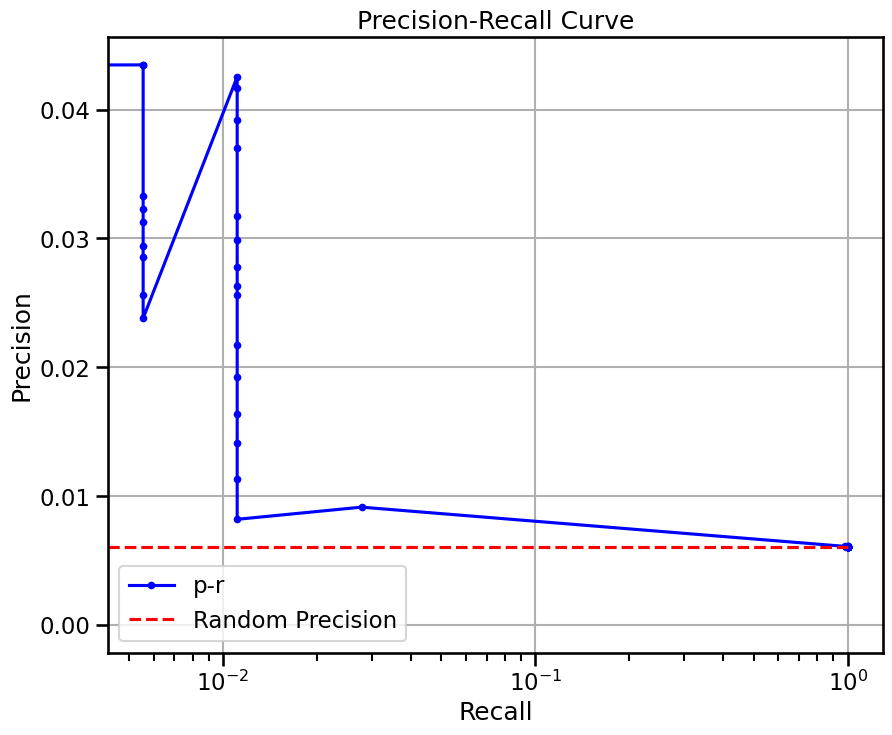

pred shape (6, 4957, 96)
true elem 180 ...
doing regression....
metrics {'used_heads': 2, 'precision': 0.0, 'random_precision': 0.004101943379732365, 'recall': 0.0, 'predicted_true': 9.0, 'number_of_true': 61.0, 'epr': 4.097222222222222}


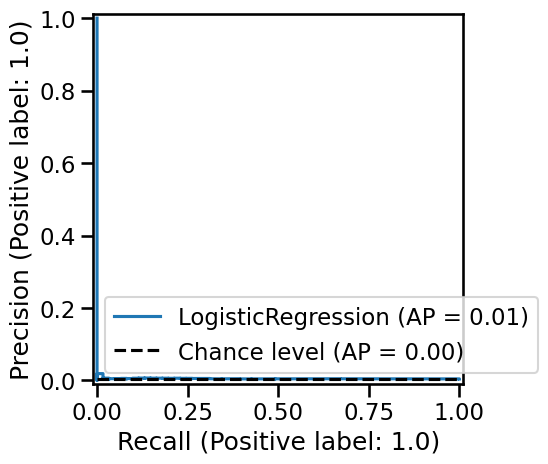

precision:  0.006052047609441194 
recall:  1.0 
random precision: 0.006053268765133172


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 3300.37it/s]


Area Under Precision-Recall Curve (AUPRC):  0.042043900660886396
EPR: 2.8132720482619935


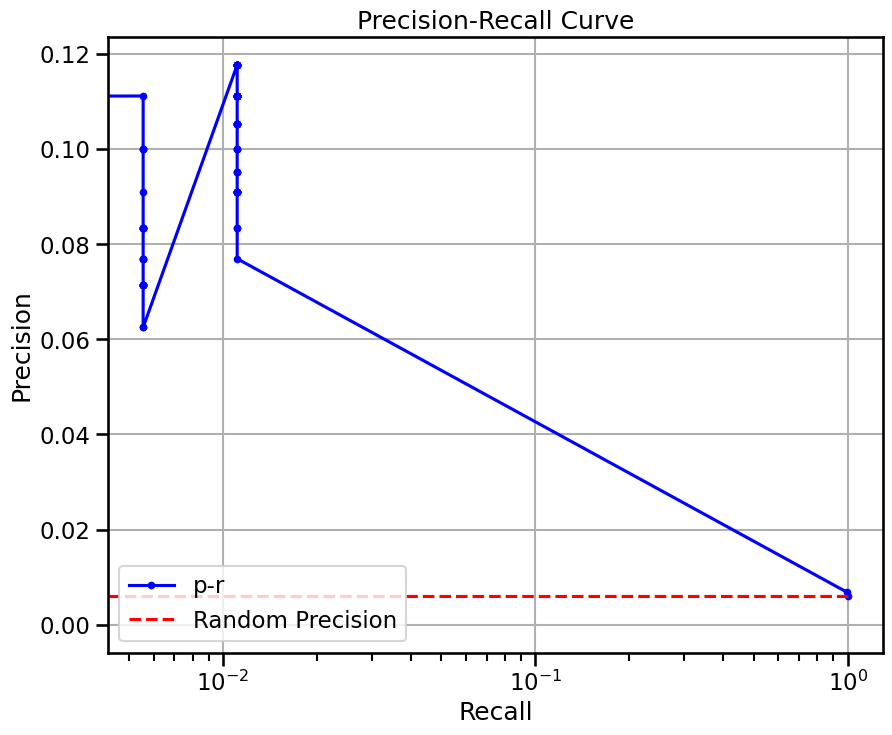

{'precision': 0.006052047609441194,
 'recall': 1.0,
 'rand_precision': 0.006053268765133172,
 'auprc': 0.042043900660886396,
 'EPR': 2.8132720482619935}

In [17]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf_omni.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

pred shape (6, 4957, 96)
true elem 180 ...
doing regression....
metrics {'used_heads': 5, 'precision': 0.0, 'random_precision': 0.00611929258287943, 'recall': 0.0, 'predicted_true': 14.0, 'number_of_true': 91.0, 'epr': 0.0}


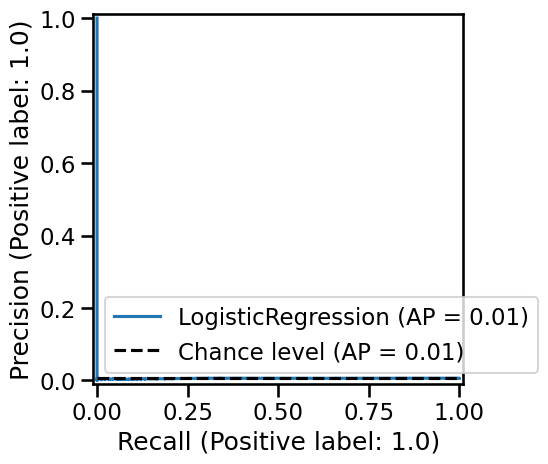

precision:  0.006052047609441194 
recall:  1.0 
random precision: 0.006053268765133172


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 3482.91it/s]


Area Under Precision-Recall Curve (AUPRC):  0.008015123159657477
EPR: 2.8132720482619935


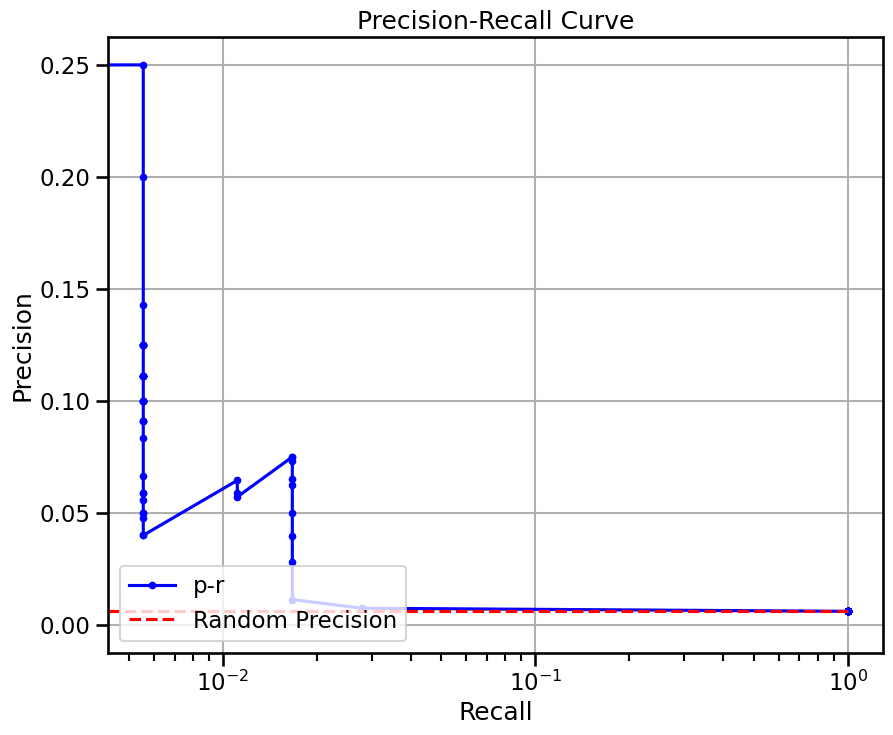

{'precision': 0.006052047609441194,
 'recall': 1.0,
 'rand_precision': 0.006053268765133172,
 'auprc': 0.008015123159657477,
 'EPR': 2.8132720482619935}

In [18]:
grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 100, 0: 1}, shuffle=True)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 14620


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 24651225, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.006052047609441194 
recall:  1.0 
random precision: 0.006053268765133172


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 6762.58it/s]


Area Under Precision-Recall Curve (AUPRC):  0.006861038460352559
EPR: 1.8544375710137608


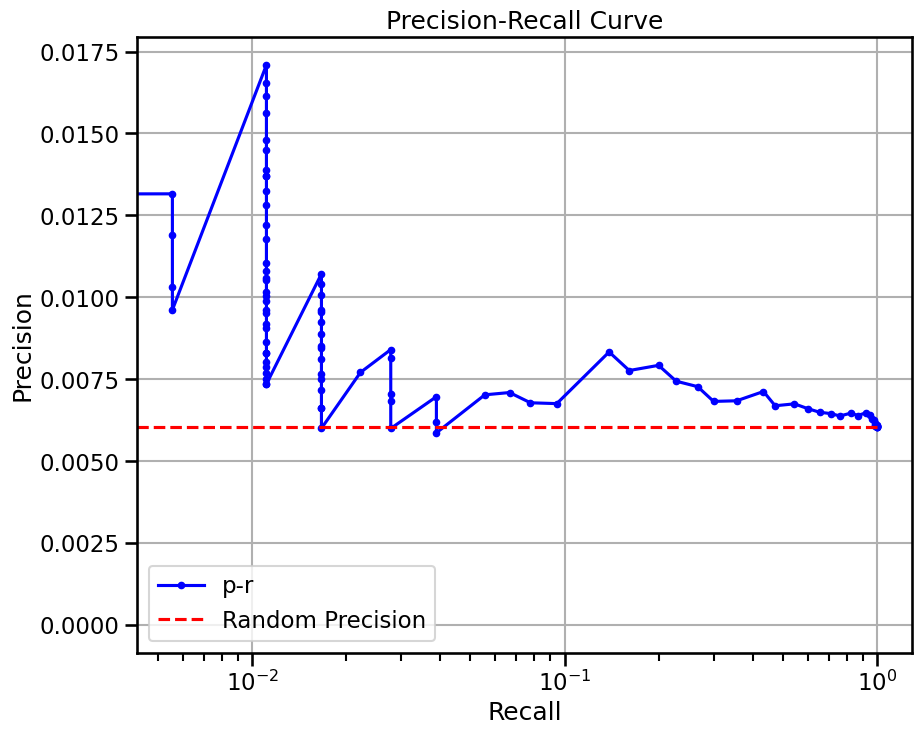

{'precision': 0.006052047609441194,
 'recall': 1.0,
 'rand_precision': 0.006053268765133172,
 'auprc': 0.006861038460352559,
 'EPR': 1.8544375710137608}

In [19]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / all


In [20]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 4404 elements,
 38)

/tmp/ipykernel_1619839/1583948291.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.011162801851274549 
recall:  1.0 
random precision: 0.01116507765185585


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1496.88it/s]


Area Under Precision-Recall Curve (AUPRC):  0.012553578908761126
EPR: 1.3575132984258327


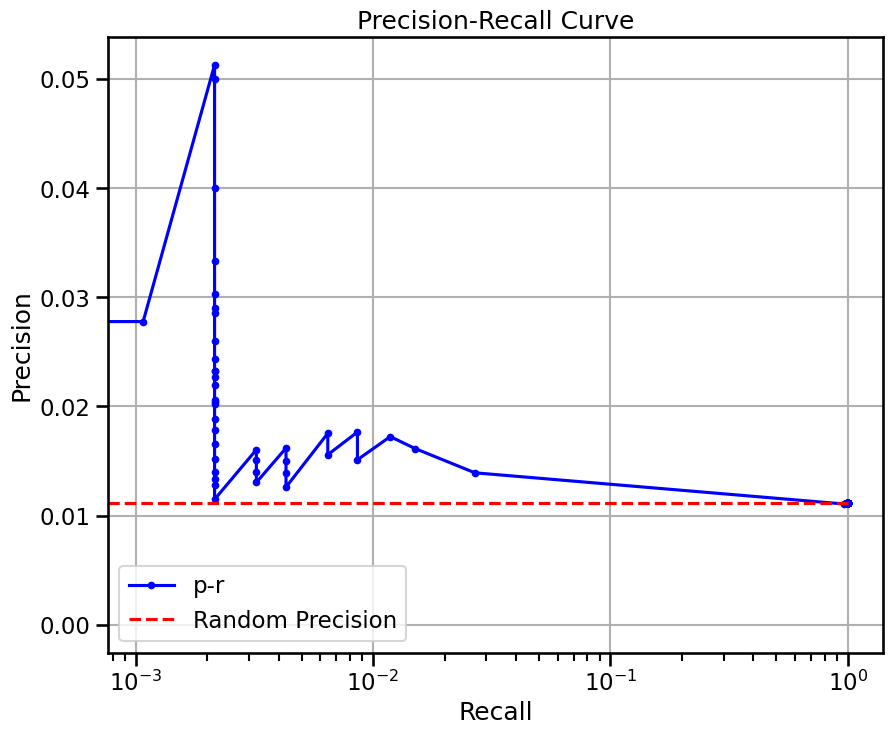

pred shape (17, 4906, 96)
true elem 931 ...
doing regression....
metrics {'used_heads': 44, 'precision': 0.0, 'random_precision': 0.0035730558020191363, 'recall': 0.0, 'predicted_true': 152.0, 'number_of_true': 149.0, 'epr': 0.0}


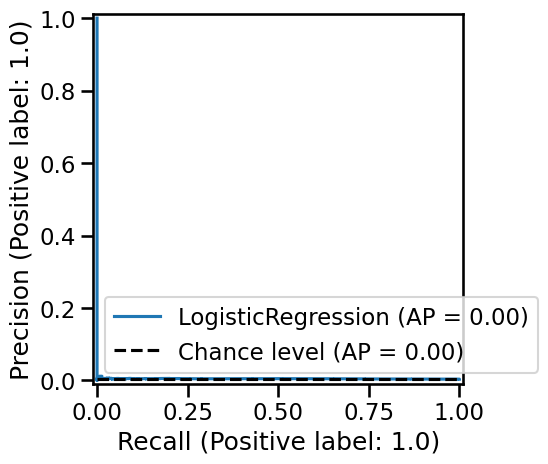

precision:  0.011162801851274549 
recall:  1.0 
random precision: 0.01116507765185585


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1488.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.023006715416460263
EPR: 2.8003468198168036


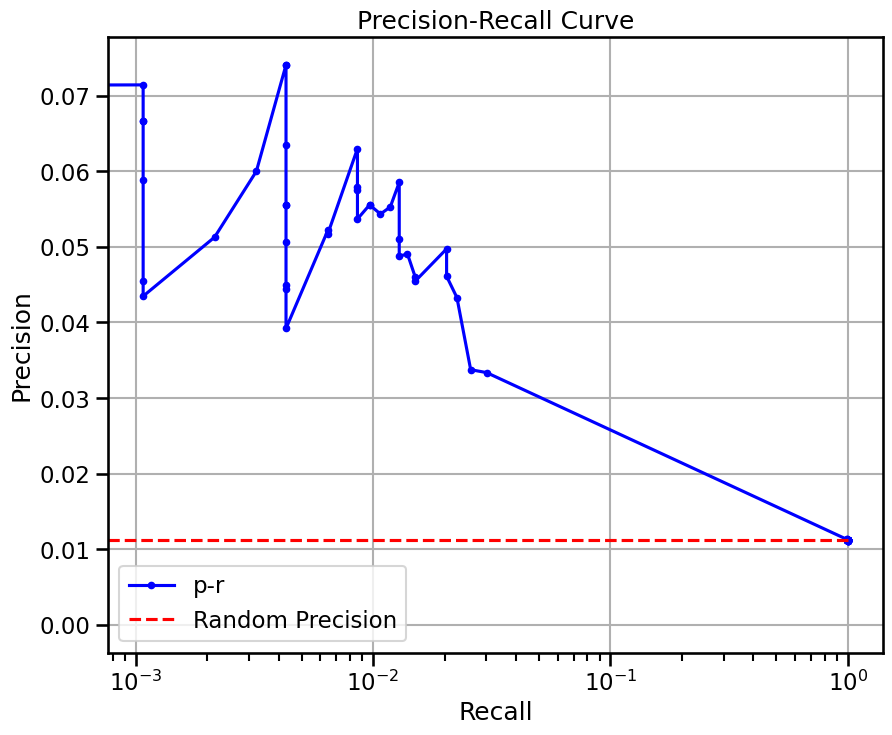

{'precision': 0.011162801851274549,
 'recall': 1.0,
 'rand_precision': 0.01116507765185585,
 'auprc': 0.023006715416460263,
 'EPR': 2.8003468198168036}

In [21]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf_omni.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 24147396, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.011162801851274549 
recall:  1.0 
random precision: 0.01116507765185585


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1725.59it/s]


Area Under Precision-Recall Curve (AUPRC):  0.012400442590680114
EPR: 0.8631946960535665


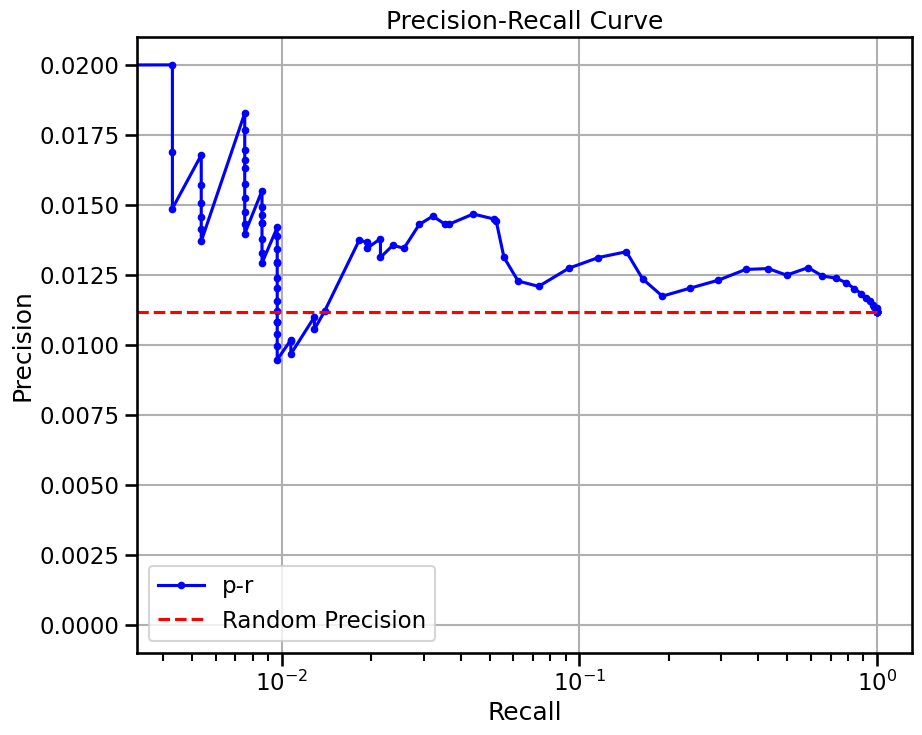

{'precision': 0.011162801851274549,
 'recall': 1.0,
 'rand_precision': 0.01116507765185585,
 'auprc': 0.012400442590680114,
 'EPR': 0.8631946960535665}

In [22]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / chip


In [23]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 94145 elements,
 49)

/tmp/ipykernel_1619839/1583948291.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.23264370158988992 
recall:  1.0 
random precision: 0.23269113149847095


 47%|███▊    | 47/99 [00:00<00:00, 465.24it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 537.92it/s]


Area Under Precision-Recall Curve (AUPRC):  0.236245104835935
EPR: 0.9038019401071665


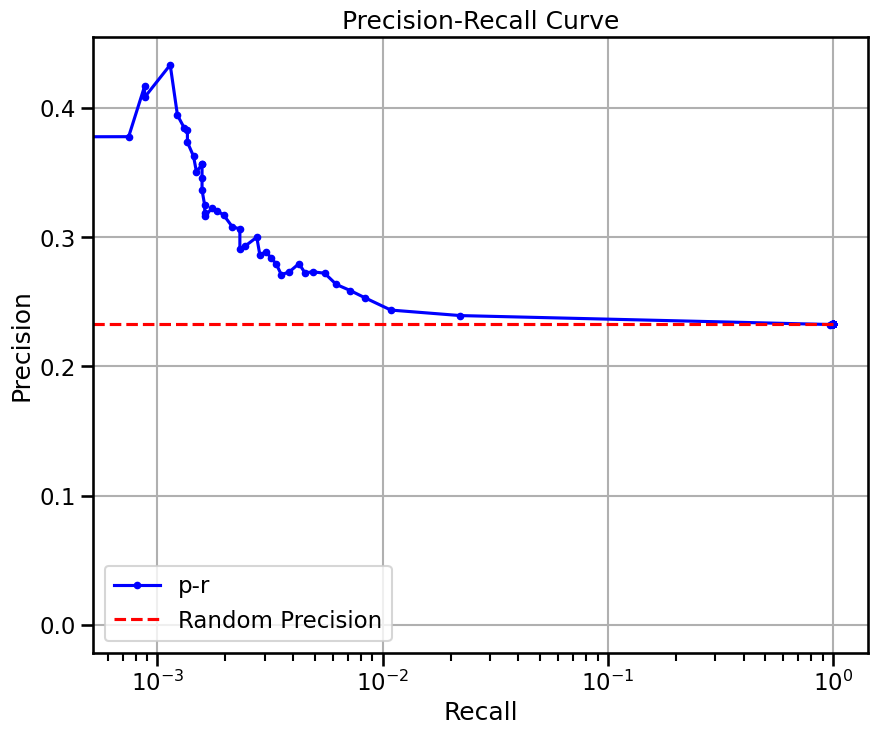

pred shape (20, 4906, 96)
true elem 22827 ...
doing regression....
metrics {'used_heads': 32, 'precision': 0.15167142274765594, 'random_precision': 0.15167142274765594, 'recall': 1.0, 'predicted_true': 49060.0, 'number_of_true': 7441.0, 'epr': 0.9845641456670156}


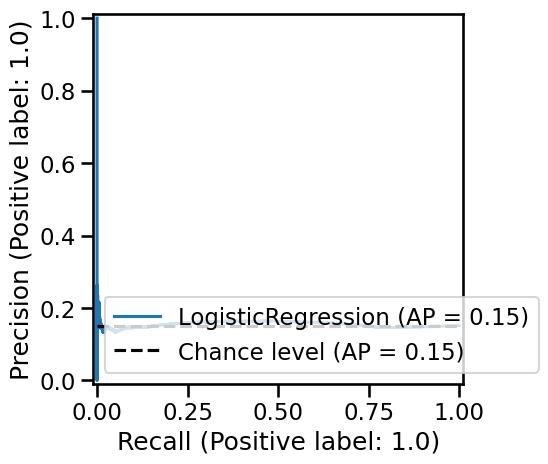

precision:  0.23264370158988992 
recall:  1.0 
random precision: 0.23269113149847095


 45%|███▋    | 45/99 [00:00<00:00, 447.07it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|████████| 99/99 [00:00<00:00, 527.42it/s]


Area Under Precision-Recall Curve (AUPRC):  0.24824032203777938
EPR: 1.1204696704050376


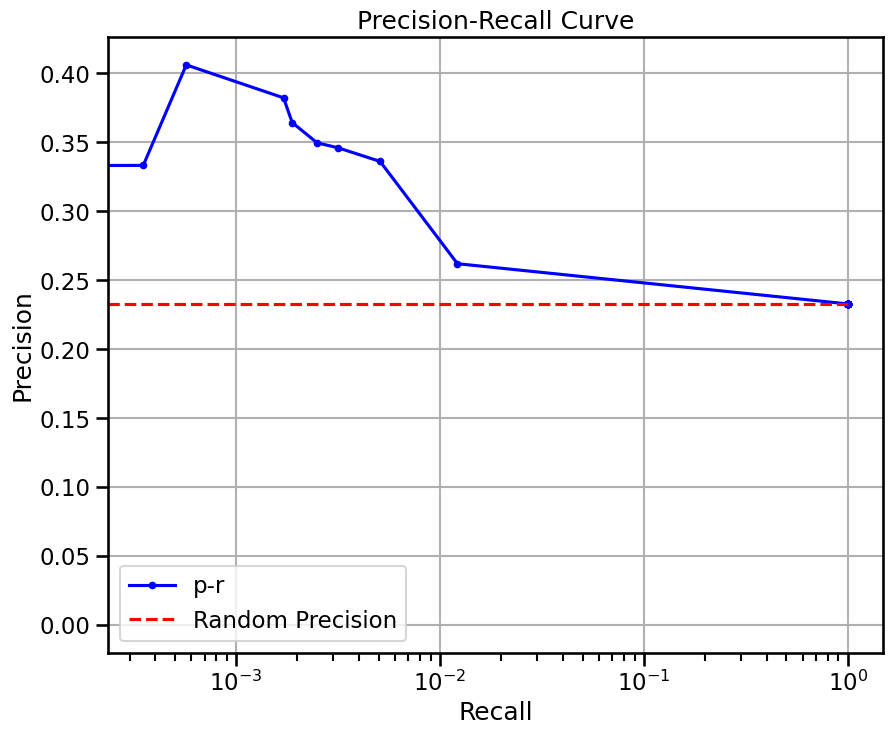

{'precision': 0.23264370158988992,
 'recall': 1.0,
 'rand_precision': 0.23269113149847095,
 'auprc': 0.24824032203777938,
 'EPR': 1.1204696704050376}

In [24]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf_omni.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 24147396, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.23264370158988992 
recall:  1.0 
random precision: 0.23269113149847095


  0%|                  | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████| 99/99 [00:00<00:00, 1099.72it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2359568986974032
EPR: 1.0246314037339386


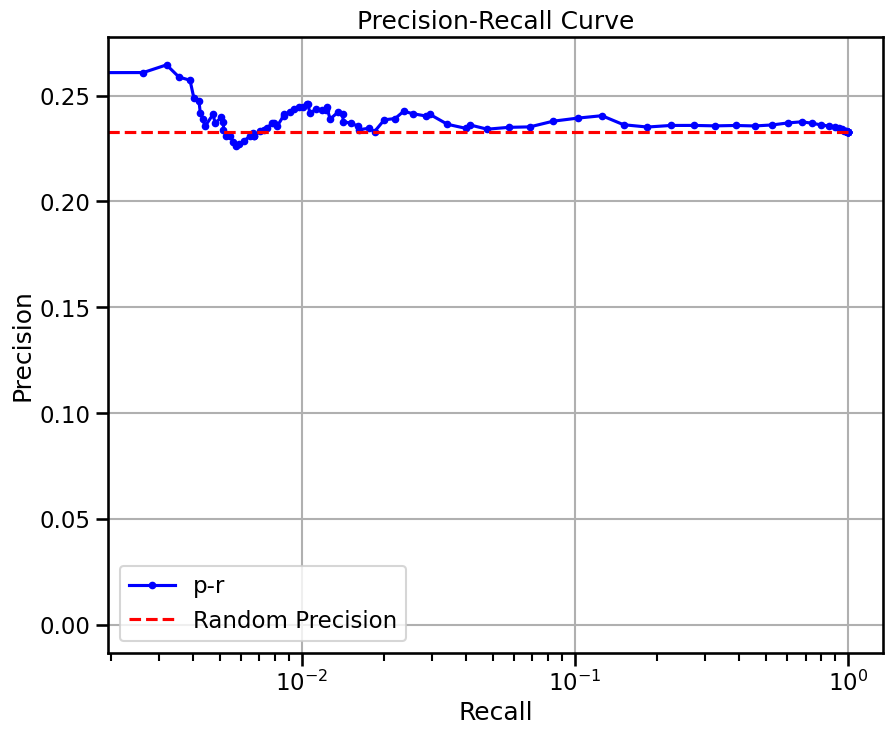

{'precision': 0.23264370158988992,
 'recall': 1.0,
 'rand_precision': 0.23269113149847095,
 'auprc': 0.2359568986974032,
 'EPR': 1.0246314037339386}

In [25]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / ko


In [26]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 39782 elements,
 125)

In [27]:
import joblib

In [28]:
clf = joblib.load('/tmp/classifier.pkl')

/tmp/ipykernel_1619839/1583948291.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.031192044234424073 
recall:  1.0 
random precision: 0.03119840346872263


 84%|████████████████████████████████▋      | 83/99 [00:00<00:00, 419.94it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████████████████████████████████████| 99/99 [00:00<00:00, 383.03it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02941344001321425
EPR: 0.9875289612548239


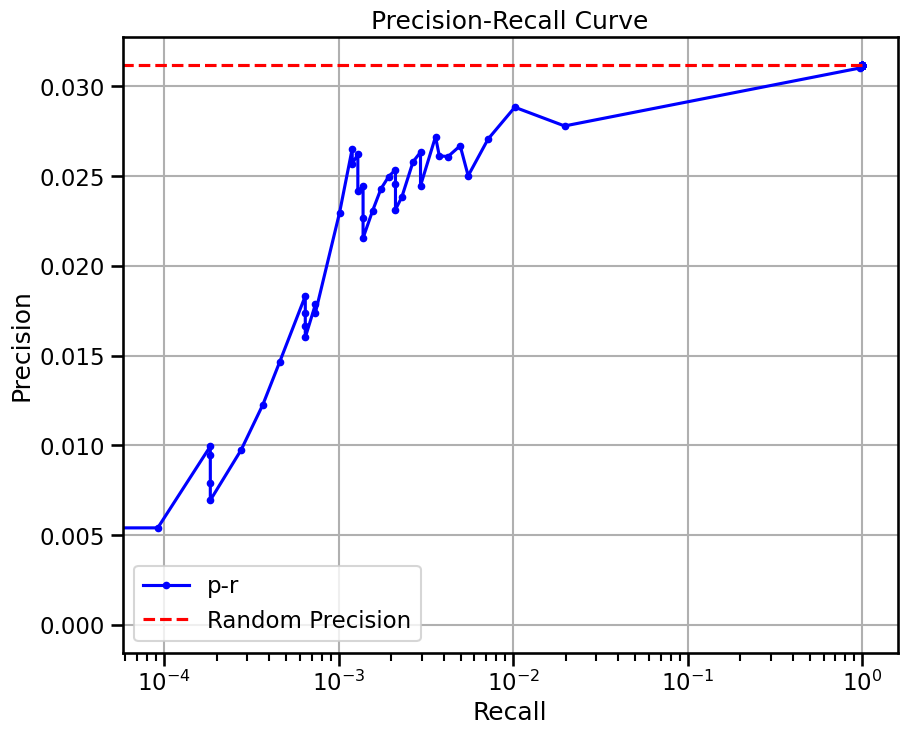

pred shape (71, 4906, 96)
true elem 10865 ...
doing regression....
metrics {'used_heads': 64, 'precision': 0.024702239437763115, 'random_precision': 0.024620614022496167, 'recall': 0.9934701492537313, 'predicted_true': 172454.0, 'number_of_true': 4288.0, 'epr': 1.661682762583439}


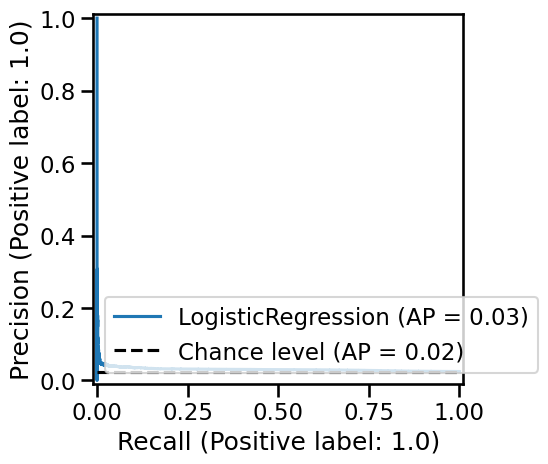

precision:  0.031192044234424073 
recall:  1.0 
random precision: 0.03119840346872263


 92%|███████████████████████████████████▊   | 91/99 [00:00<00:00, 468.53it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████████████████████████████████████| 99/99 [00:00<00:00, 445.37it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0402129727437515
EPR: 1.6059513298339998


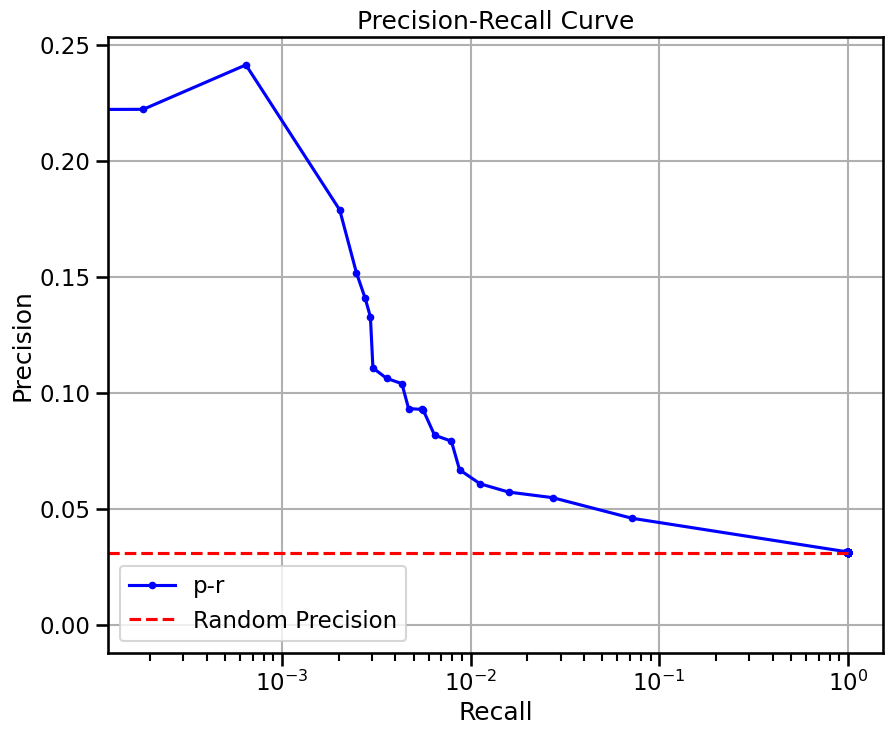

{'precision': 0.031192044234424073,
 'recall': 1.0,
 'rand_precision': 0.03119840346872263,
 'auprc': 0.0402129727437515,
 'EPR': 1.6059513298339998}

In [29]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf_omni.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.5, train_size=0.5, class_weight={
                             1: 40, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_1619839/590398501.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 9459


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 24147396, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.031192044234424073 
recall:  1.0 
random precision: 0.03119840346872263


 55%|█████████████████████▎                 | 54/99 [00:00<00:00, 531.58it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|███████████████████████████████████████| 99/99 [00:00<00:00, 557.37it/s]


Area Under Precision-Recall Curve (AUPRC):  0.032457728681037634
EPR: 1.0790470288738923


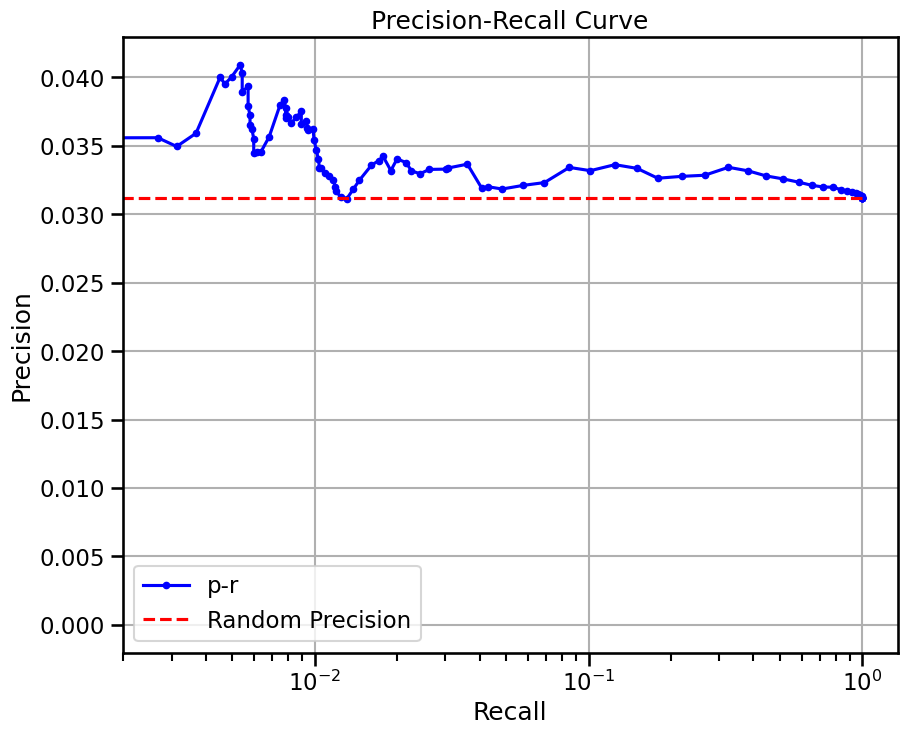

{'precision': 0.031192044234424073,
 'recall': 1.0,
 'rand_precision': 0.03119840346872263,
 'auprc': 0.032457728681037634,
 'EPR': 1.0790470288738923}

In [30]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     preprocess="softmax",
                     head_agg='max',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=64,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)